In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore errors and warnings
import warnings
warnings.filterwarnings('ignore')



In [259]:
df = pd.read_csv(r"E:\Full Data Science Projects\Weather type classification\weather_classification_data.csv")

In [260]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [262]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [263]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [264]:
# check unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}')

Cloud Cover: ['partly cloudy' 'clear' 'overcast' 'cloudy']
Season: ['Winter' 'Spring' 'Summer' 'Autumn']
Location: ['inland' 'mountain' 'coastal']
Weather Type: ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


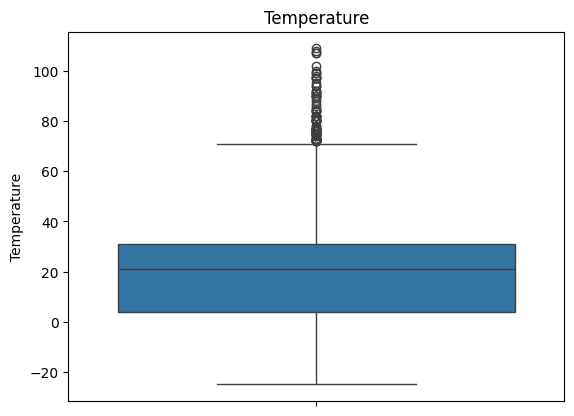

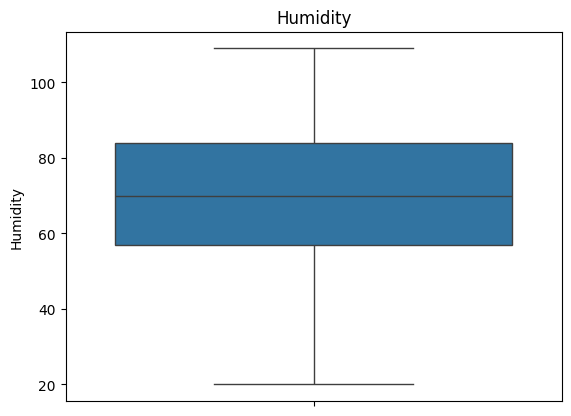

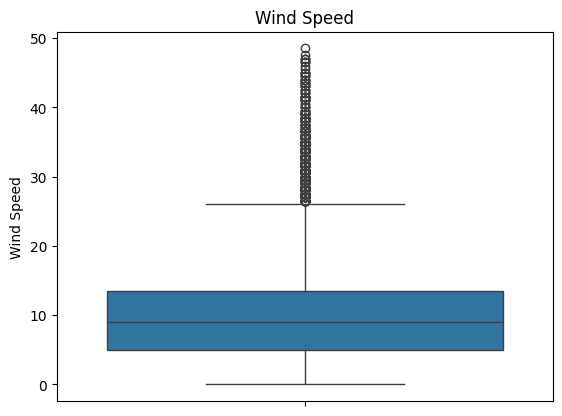

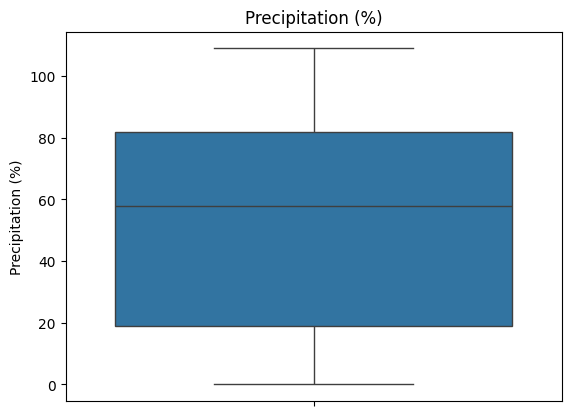

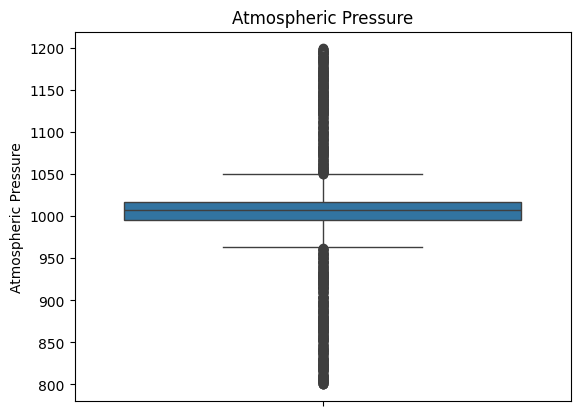

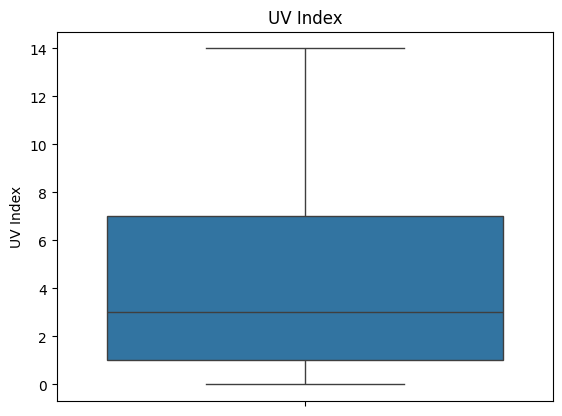

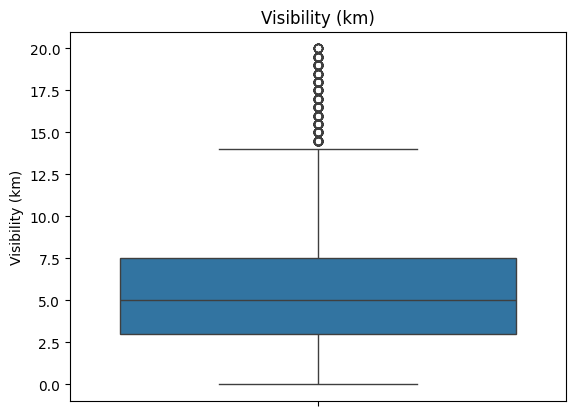

In [265]:
# box plot of all numierical columns
for col in df.columns:
    if df[col].dtype ==  'float64' or df[col].dtype == 'int64':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

In [266]:
# create iqr function to remove outliers

def iqr_outliers(df, k):
    # 
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + k * iqr
            lower_bound = q1 - k * iqr
            df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

df = iqr_outliers(df, 1.5)

In [267]:
df_rainy = df[df['Weather Type'] == 'Rainy']
df_sunny = df[df['Weather Type'] == 'Sunny']
df_snowy = df[df['Weather Type'] == 'Snowy']
df_cloudy = df[df['Weather Type'] == 'Cloudy']

min_rainy = df_rainy['Temperature'].min()
max_rainy = df_rainy['Temperature'].max()

min_sunny = df_sunny['Temperature'].min()
max_sunny = df_sunny['Temperature'].max()

min_snowy = df_snowy['Temperature'].min()
max_snowy = df_snowy['Temperature'].max()

min_cloudy = df_cloudy['Temperature'].min()
max_cloudy = df_cloudy['Temperature'].max()

print(f"the rainy weather temperature ranges from {min_rainy} to {max_rainy}")
print(f"the sunny weather temperature ranges from {min_sunny} to {max_sunny}")
print(f"the snowy weather temperature ranges from {min_snowy} to {max_snowy}")
print(f"the cloudy weather temperature ranges from {min_cloudy} to {max_cloudy}")
print("---------------------------------------------------------------")

min_rainy = df_rainy['Humidity'].min()
max_rainy = df_rainy['Humidity'].max()

min_sunny = df_sunny['Humidity'].min()
max_sunny = df_sunny['Humidity'].max()

min_snowy = df_snowy['Humidity'].min()
max_snowy = df_snowy['Humidity'].max()

min_cloudy = df_cloudy['Humidity'].min()
max_cloudy = df_cloudy['Humidity'].max()

print(f"the rainy weather humidity ranges from {min_rainy} to {max_rainy}")
print(f"the sunny weather humidity ranges from {min_sunny} to {max_sunny}")
print(f"the snowy weather humidity ranges from {min_snowy} to {max_snowy}")
print(f"the cloudy weather humidity ranges from {min_cloudy} to {max_cloudy}")
print("---------------------------------------------------------------")

min_rainy = df_rainy['Wind Speed'].min()
max_rainy = df_rainy['Wind Speed'].max()

min_sunny = df_sunny['Wind Speed'].min()
max_sunny = df_sunny['Wind Speed'].max()

min_snowy = df_snowy['Wind Speed'].min()
max_snowy = df_snowy['Wind Speed'].max()

min_cloudy = df_cloudy['Wind Speed'].min()
max_cloudy = df_cloudy['Wind Speed'].max()

print(f"the rainy weather wind speed ranges from {min_rainy} to {max_rainy}")
print(f"the sunny weather wind speed ranges from {min_sunny} to {max_sunny}")
print(f"the snowy weather wind speed ranges from {min_snowy} to {max_snowy}")
print(f"the cloudy weather wind speed ranges from {min_cloudy} to {max_cloudy}")


the rainy weather temperature ranges from -19.0 to 70.0
the sunny weather temperature ranges from -16.0 to 71.0
the snowy weather temperature ranges from -24.0 to 49.0
the cloudy weather temperature ranges from -18.0 to 71.0
---------------------------------------------------------------
the rainy weather humidity ranges from 21 to 109
the sunny weather humidity ranges from 20 to 109
the snowy weather humidity ranges from 20 to 109
the cloudy weather humidity ranges from 20 to 109
---------------------------------------------------------------
the rainy weather wind speed ranges from 0.0 to 26.0
the sunny weather wind speed ranges from 0.0 to 24.5
the snowy weather wind speed ranges from 0.0 to 26.0
the cloudy weather wind speed ranges from 0.0 to 26.0


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11586 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11586 non-null  float64
 1   Humidity              11586 non-null  int64  
 2   Wind Speed            11586 non-null  float64
 3   Precipitation (%)     11586 non-null  float64
 4   Cloud Cover           11586 non-null  object 
 5   Atmospheric Pressure  11586 non-null  float64
 6   UV Index              11586 non-null  int64  
 7   Season                11586 non-null  object 
 8   Visibility (km)       11586 non-null  float64
 9   Location              11586 non-null  object 
 10  Weather Type          11586 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


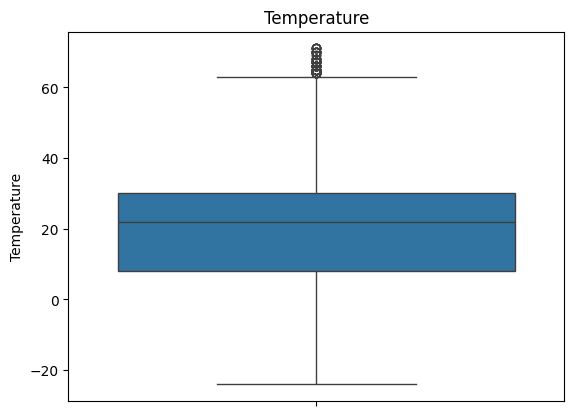

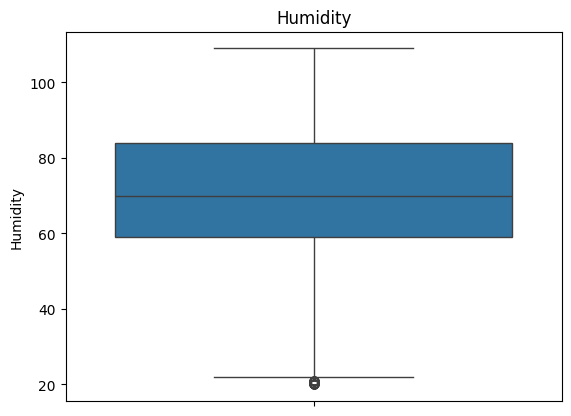

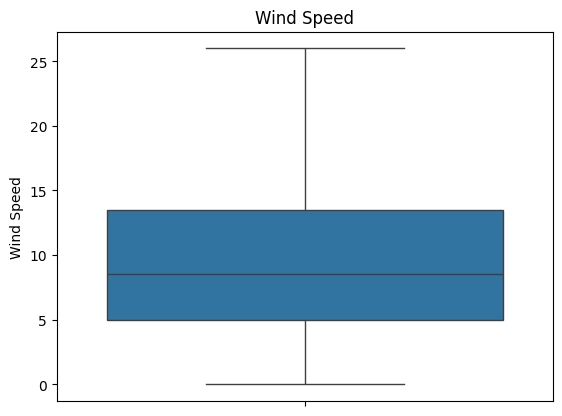

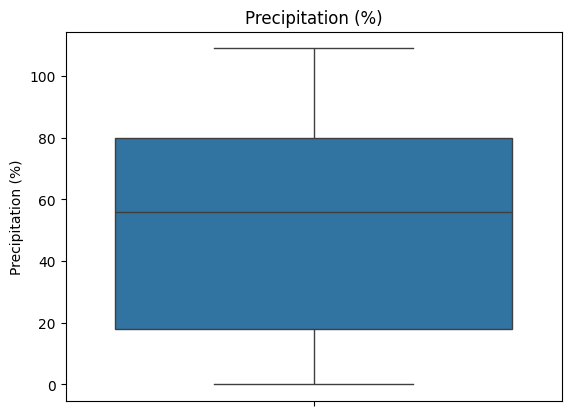

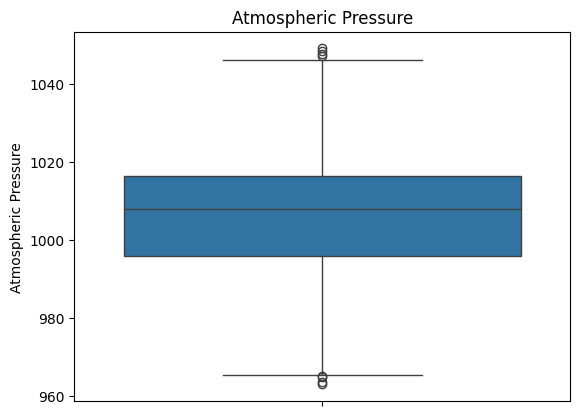

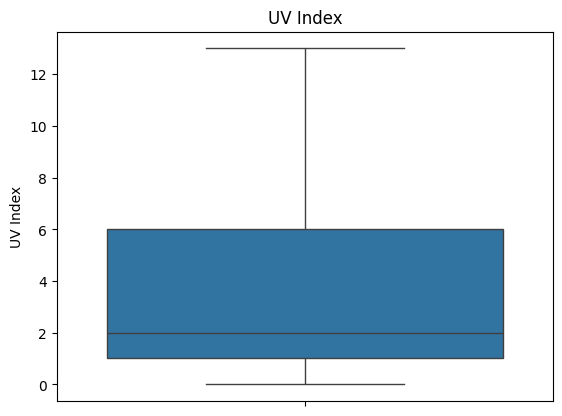

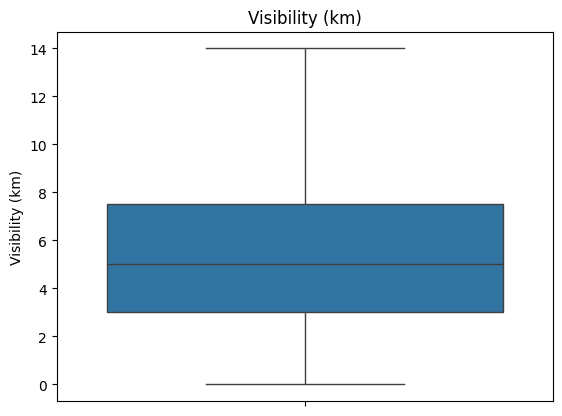

In [269]:
# plot box plots again to see if outliers have been removed

for col in df.columns:
    if df[col].dtype ==  'float64' or df[col].dtype == 'int64':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

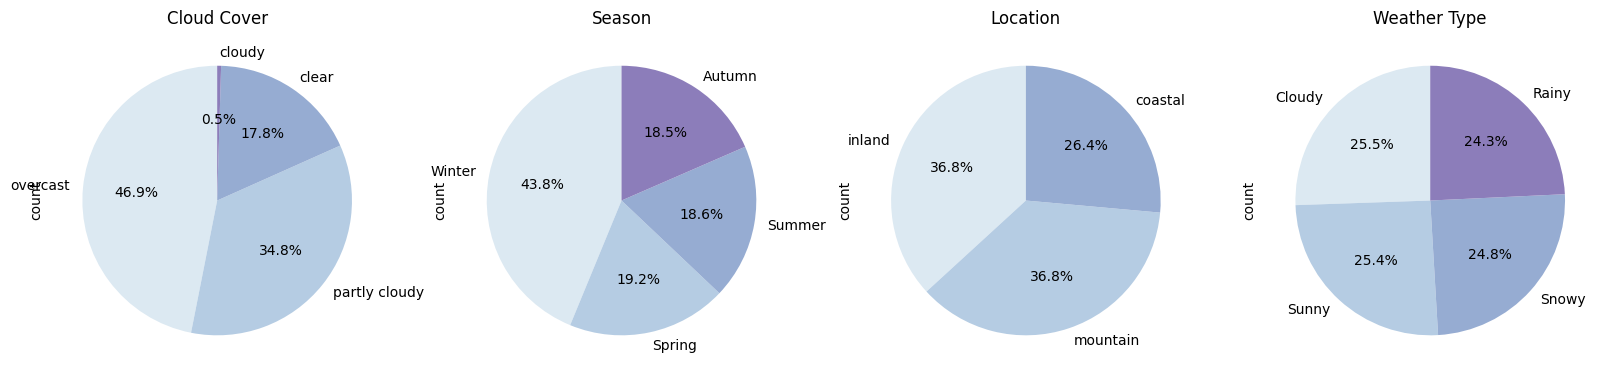

In [270]:
# create a pie chart for each categorical column in a subplots 4*1
df_cat = df.select_dtypes(include='object')

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for i, col in enumerate(df_cat.columns):
    if df[col].dtype == 'object':
        df[col].value_counts().plot.pie(ax=axs[i], autopct='%1.1f%%', colors=sns.color_palette('BuPu'), startangle=90)
        axs[i].set_title(col)
plt.show()

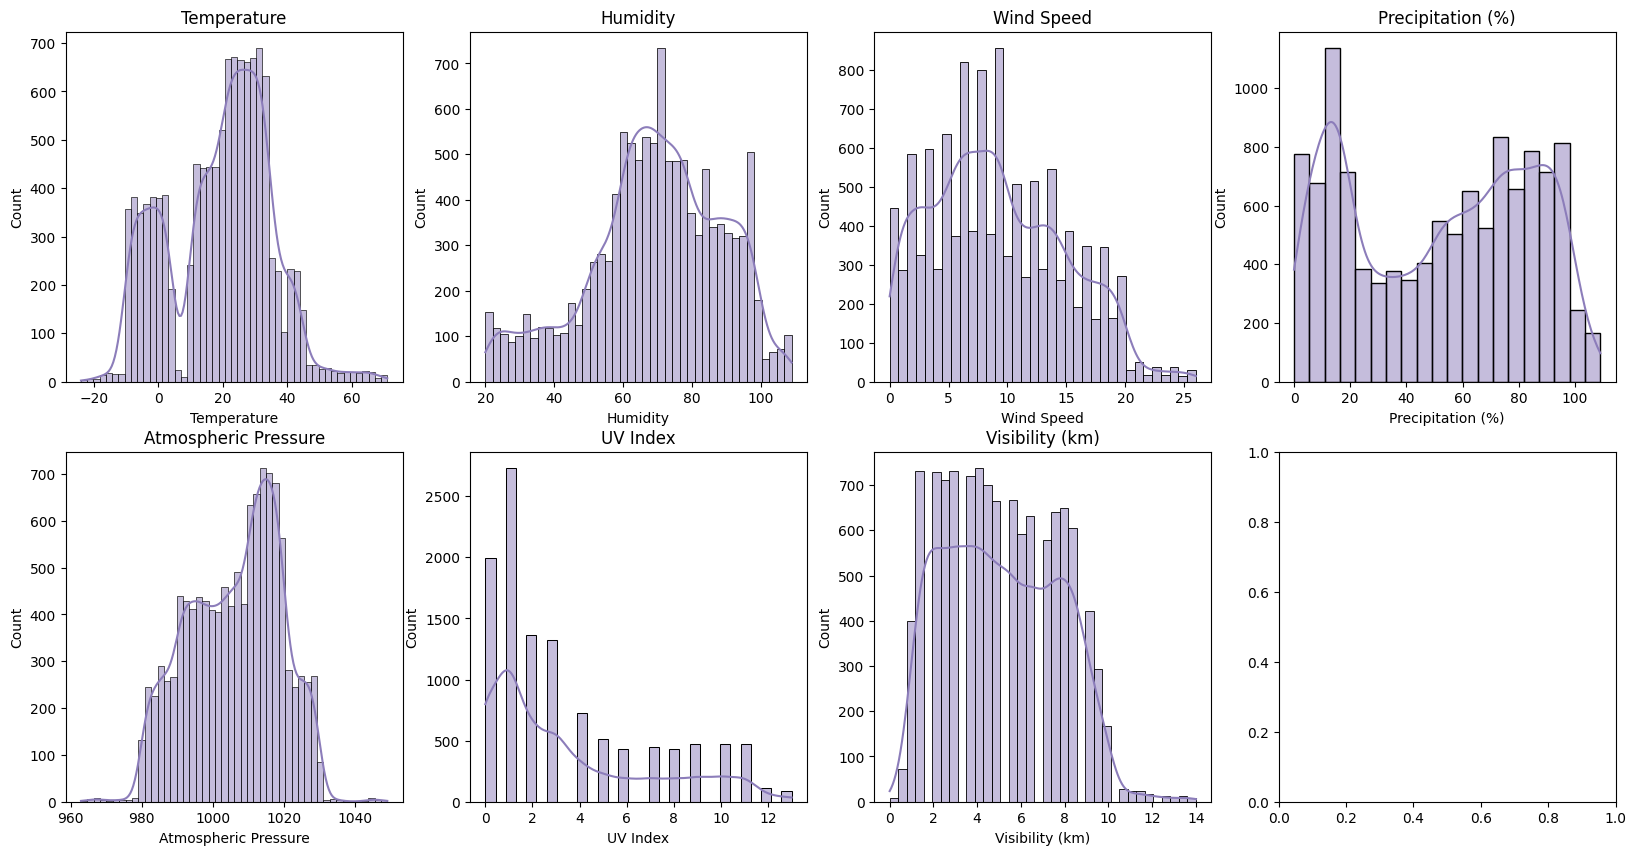

In [271]:
# create distribution plots for all numerical columns in subplots 4*2

df_num = df.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(df_num.columns):
    sns.histplot(df[col], ax=axs[i//4, i%4], kde=True, color='#8C7DBA')
    axs[i//4, i%4].set_title(col)
plt.show()

In [272]:
# fix skewness in 'Wind Speed' columns
df['Wind Speed'] = np.log1p(df['Wind Speed'])

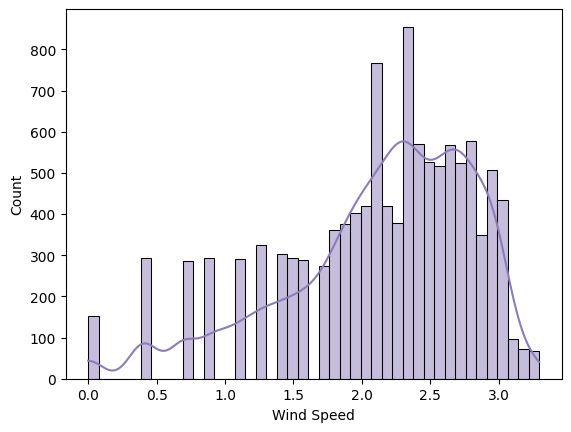

In [273]:
sns.histplot(df['Wind Speed'], kde=True, color='#8C7DBA')
plt.show()

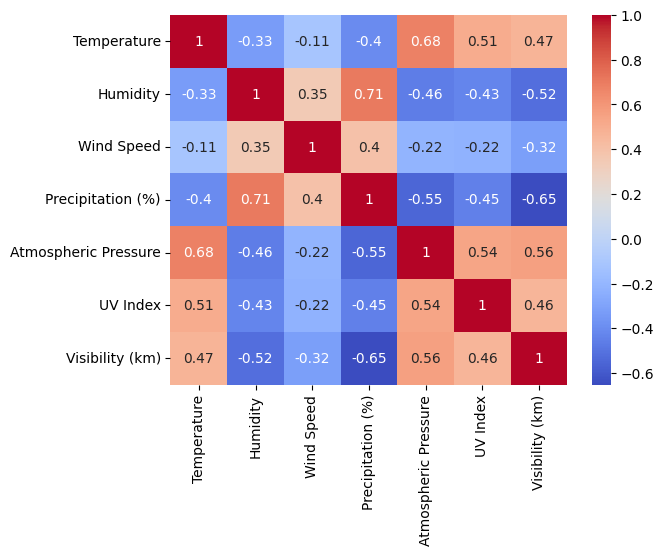

In [274]:
# To avoid the FutureWarning, explicitly specify the numeric_only parameter
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

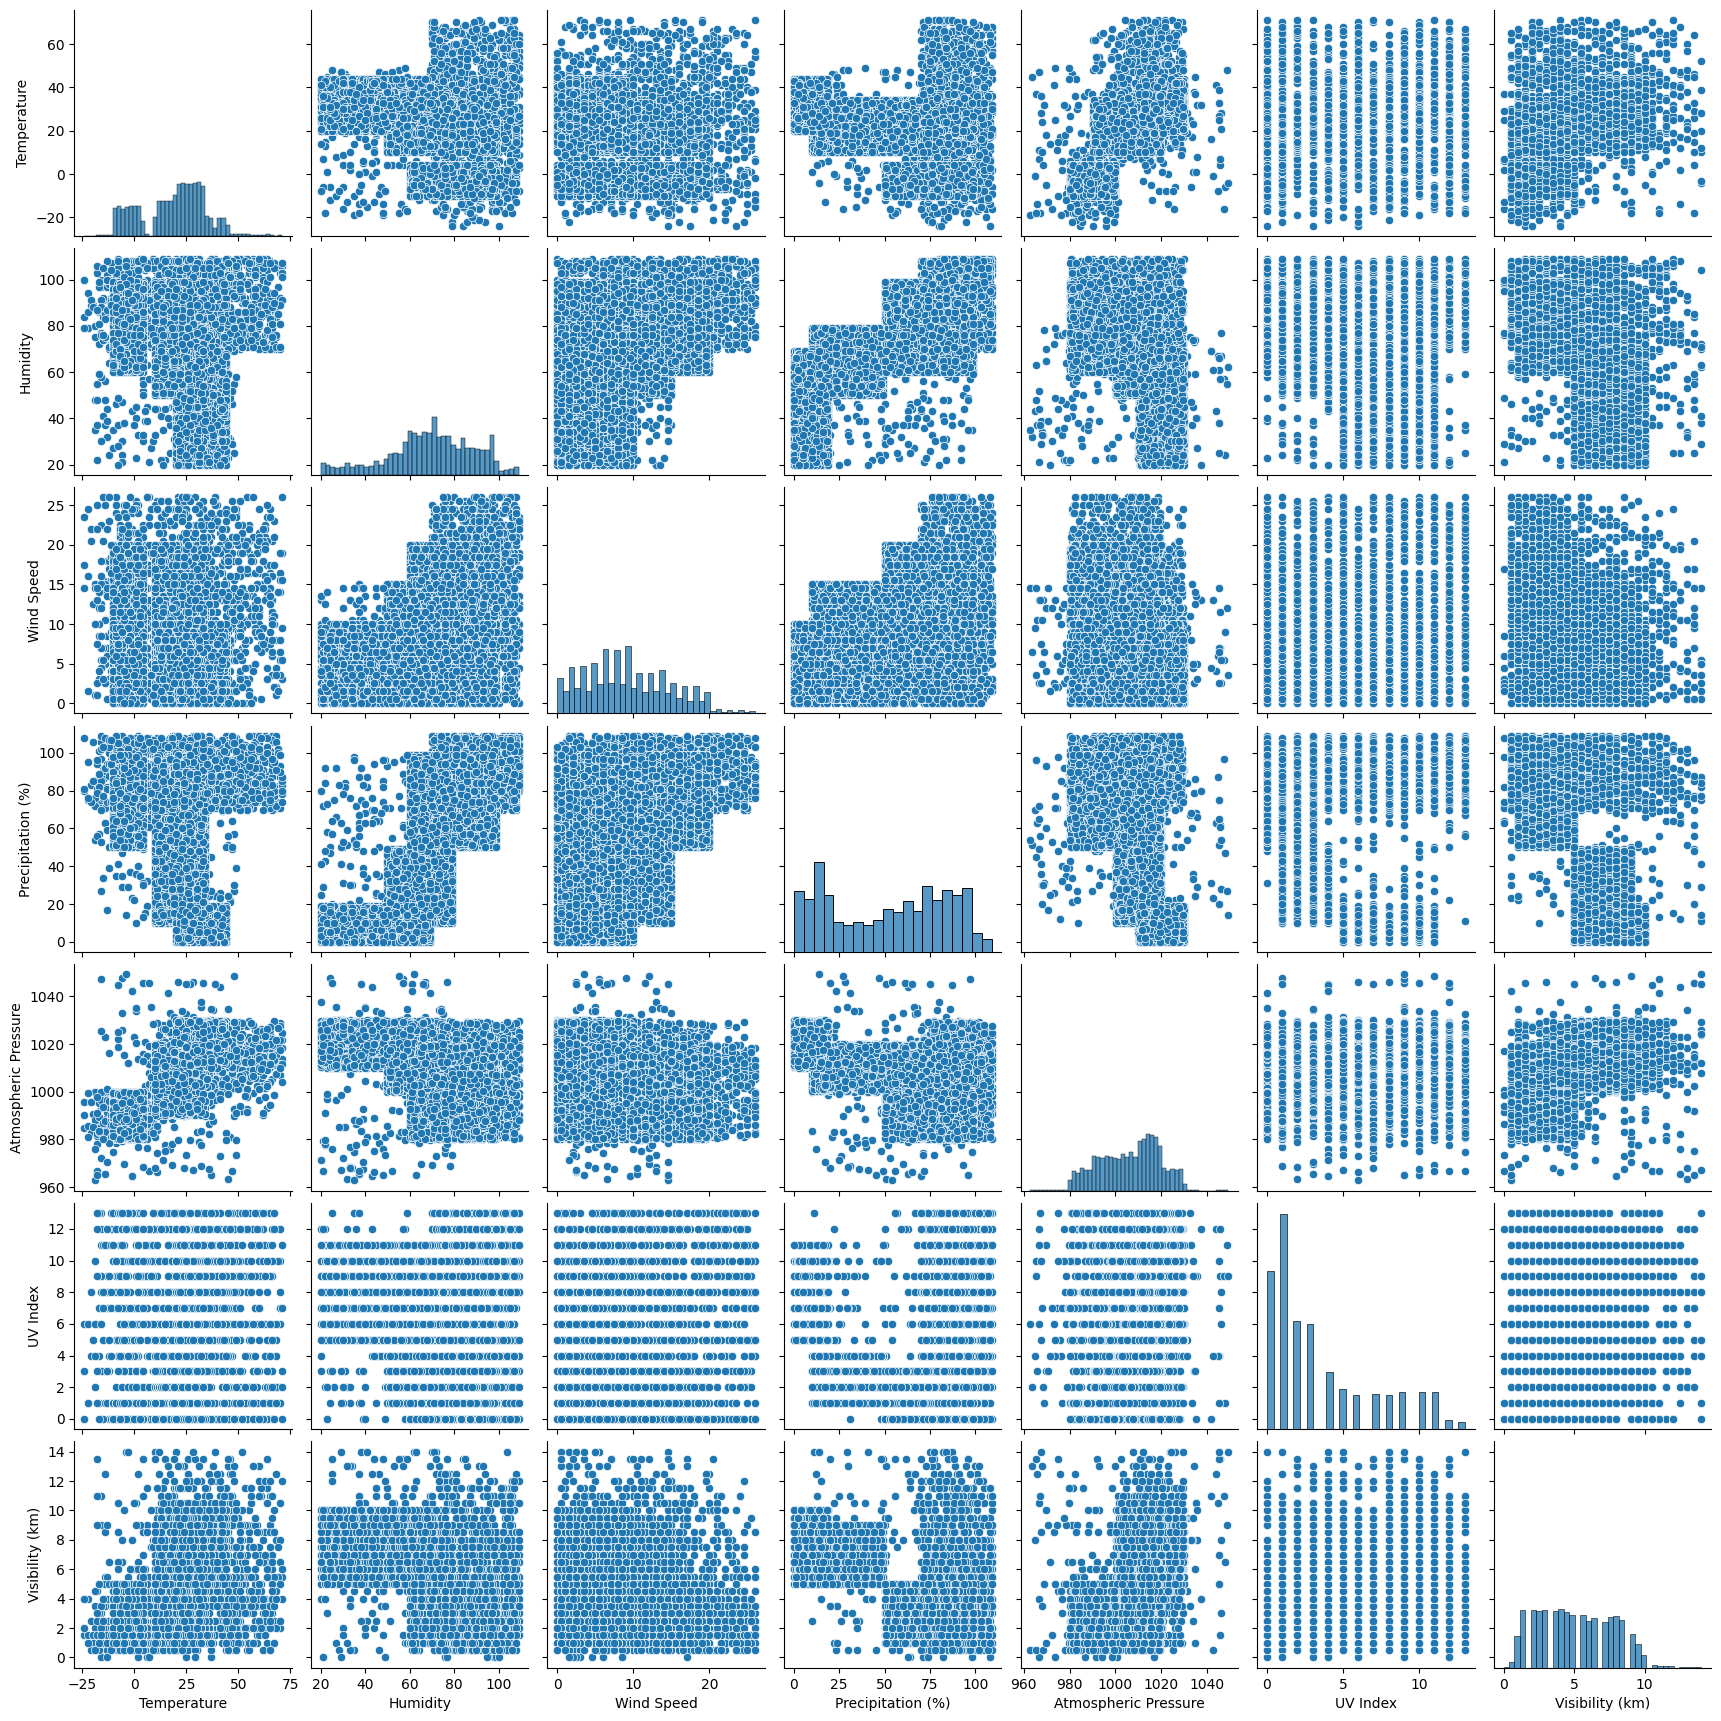

In [275]:
# create a pairplot of all numerical columns

sns.pairplot(df_num)
plt.show()

<Axes: xlabel='count', ylabel='Weather Type'>

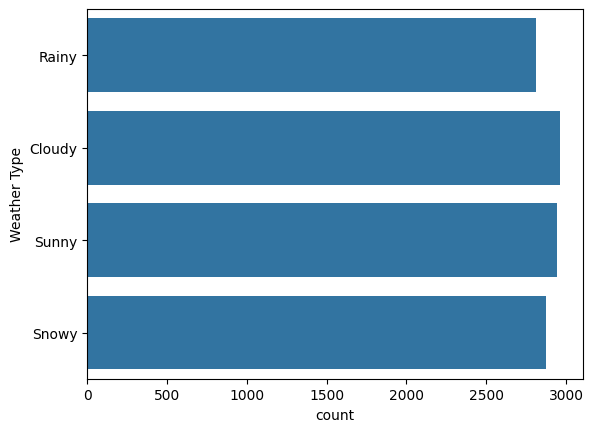

In [276]:
# create a countplot of the target column

sns.countplot(df['Weather Type'])

In [277]:
# label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [278]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop('Weather Type', axis=1)
y = df['Weather Type']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [279]:
X_train

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
6572,-3.0,74,2.862201,87.0,2,989.04,0,3,3.5,2
7089,42.0,28,1.609438,16.0,3,1019.22,6,2,6.5,1
1178,41.0,20,2.014903,3.0,3,1024.98,10,1,10.0,1
3270,21.0,70,3.044522,101.0,2,1010.60,13,2,10.5,0
6857,-4.0,84,2.862201,52.0,2,994.16,0,3,5.0,2
...,...,...,...,...,...,...,...,...,...,...
12852,32.0,90,2.995732,55.0,2,1007.95,0,2,1.5,2
5843,38.0,63,1.386294,8.0,0,1011.41,5,1,5.5,2
6071,14.0,70,2.708050,29.0,3,1007.08,2,1,8.5,0
975,26.0,61,2.674149,73.0,3,995.23,2,0,2.0,1


In [280]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [281]:
X_train

array([[-1.37015347,  0.23181421,  1.06009582, ...,  0.95379896,
        -0.61300216,  1.14258187],
       [ 1.45227018, -2.13414691, -0.71809029, ...,  0.09670095,
         0.53624404, -0.13307052],
       [ 1.38954965, -2.54561841, -0.14256847, ..., -0.76039706,
         1.87703128, -0.13307052],
       ...,
       [-0.30390453,  0.02607846,  0.84129258, ..., -0.76039706,
         1.30240818, -1.40872292],
       [ 0.44874177, -0.43682697,  0.79317233, ..., -1.61749507,
        -1.18762527, -0.13307052],
       [ 0.44874177, -0.95116635,  0.88783483, ..., -0.76039706,
         0.15316197,  1.14258187]])

In [282]:
# create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

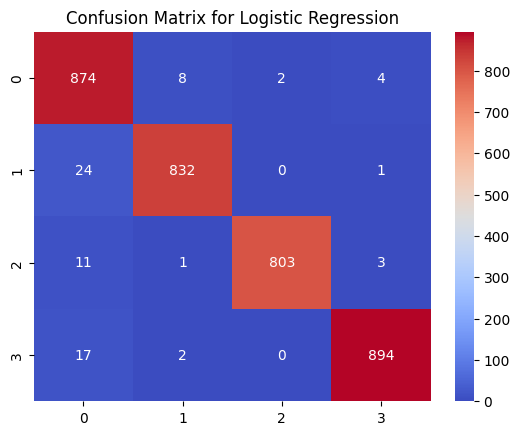

In [294]:
# make predictions
y_pred = model.predict(X_test)

# evaluate the model
val_conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(val_conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [284]:
# accuracy score
print(accuracy_score(y_test, y_pred))

0.9476409666283084


In [285]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       888
           1       0.93      0.96      0.94       857
           2       0.99      0.98      0.99       818
           3       0.96      0.92      0.94       913

    accuracy                           0.95      3476
   macro avg       0.95      0.95      0.95      3476
weighted avg       0.95      0.95      0.95      3476



In [286]:
# create a naive bias model

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

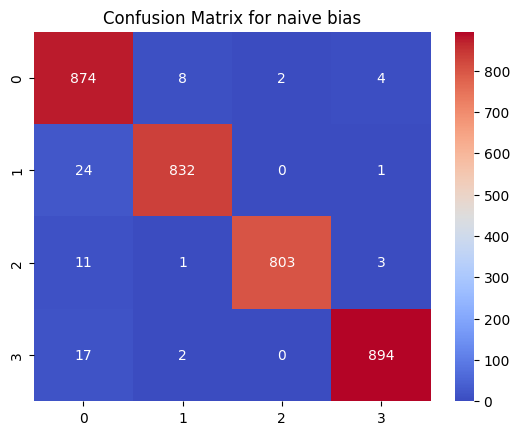

In [295]:
# make predictions
y_pred = model.predict(X_test)

val_conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(val_conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix for naive bias')
plt.show()

In [288]:
# accuracy score
print(accuracy_score(y_test, y_pred))

0.9559838895281934


In [289]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       888
           1       0.93      0.96      0.95       857
           2       0.99      0.98      0.98       818
           3       0.96      0.95      0.96       913

    accuracy                           0.96      3476
   macro avg       0.96      0.96      0.96      3476
weighted avg       0.96      0.96      0.96      3476



In [290]:
# create a random forest model

from sklearn.ensemble import RandomForestClassifier
model =  ()
model.fit(X_train, y_train)

RandomForestClassifier()

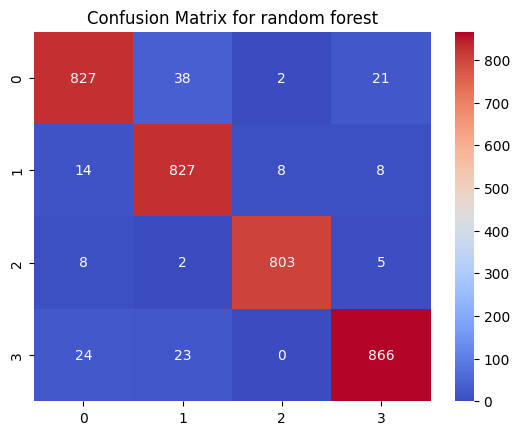

In [291]:
val_conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(val_conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix for random forest')
plt.show()

In [292]:
# accuracy score
print(accuracy_score(y_test, y_pred))

0.9559838895281934


In [293]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       888
           1       0.93      0.96      0.95       857
           2       0.99      0.98      0.98       818
           3       0.96      0.95      0.96       913

    accuracy                           0.96      3476
   macro avg       0.96      0.96      0.96      3476
weighted avg       0.96      0.96      0.96      3476

